In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mtrain.smallnet.predict import segment_tile_and_predict

In [3]:
import cv2

In [4]:
from pathlib import Path
SAMPLES = Path("/Users/hariomnarang/Desktop/personal/roads/mapillary_downloader/data/samples")

In [7]:
imgs= list(SAMPLES.rglob("*.jpg"))


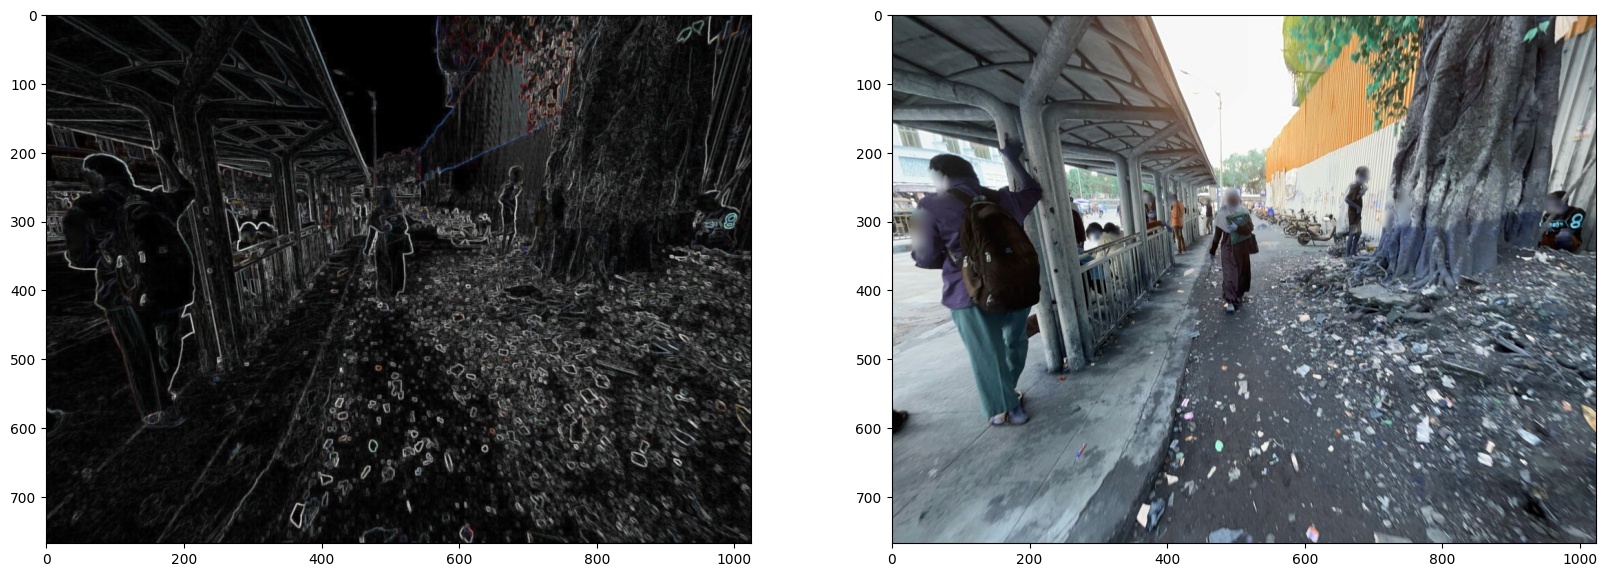

In [25]:
import matplotlib.pyplot as plt


img = cv2.imread("/Users/hariomnarang/Desktop/personal/roads/datasets/T004-taco-crops/14325.jpeg")
# img = img[400:500, 600:800]
# img = cv2.imread("/Users/hariomnarang/Desktop/personal/roads/datasets/crops/v1/1.png")
# img = cv2.imread("/Users/hariomnarang/Desktop/personal/roads/datasets/crops/raw/2.png")


morph = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)))
_, ax = plt.subplots(1,2,figsize=(20,12))
ax[0].imshow(morph, cmap="gray")
ax[1].imshow(img)

In [ ]:
plt.imshow(plt.imread())

In [4]:
import matplotlib.pyplot as plt
from ipywidgets import Button, VBox, Output
from IPython.display import display

class WindowShow:
    def __init__(self, imgs, learner, tile_size):
        self.imgs = imgs
        self._learner = learner
        self._tile_size = tile_size
        self.idx = 0
        self._next = Button(description="Next")
        self._next.on_click(self._go_next)
        self._out = Output()
    
    def _render(self):
        with self._out:
            self._out.clear_output(wait=True)
            _, ax = plt.subplots(1,2, figsize=(20,12))
            item = self.imgs[self.idx]
            ax[0].imshow(plt.imread(item))
            ax[1].imshow(segment_tile_and_predict(item, self._learner, self._tile_size, False))
            plt.show()

    def _go_next(self, *a, **kw):
        self.idx += 1
        self._render()
    
    def display_ui(self):
        self._render()

        ui = VBox([self._next, self._out])
        display(ui)


def _parse_size_from_title(title):
    for part in title.split("-"):
        parts = part.split("=")
        if parts[0] == "FILE_SIZE":
            return int(parts[1])
        
    raise

In [27]:
from tqdm import tqdm
import shutil
from fastai.vision.all import load_learner
import random

def one_experiment(exp_dir, imgs, n=100):
    imgs = imgs[:n]
    random.shuffle(imgs)
    learner_path = exp_dir / "log" / "export.pkl"
    learner = load_learner(learner_path)
    size = _parse_size_from_title(exp_dir.name)
    print(f"size={size}")

    inf = exp_dir / "inf"
    inf.mkdir(parents=True, exist_ok=True)


    for img in tqdm(imgs):
        dest = inf / img.stem
        dest.mkdir(parents=True, exist_ok=True)
        shutil.copy(img, dest)
        res = segment_tile_and_predict(img, learner, size, False)
        plt.imsave(dest / "res.png", res)

In [28]:
EXP = "T005-with-taco-and-ddg/FINE_TUNE_EPOCHS=20-FIT_ONE_CYCLE_EPOCHS=10-MODEL=mobilenet_v3_small-NUM_SAMPLES=5000-FILE_SIZE=30-LOSS=ELSE-retries=0"

imgs = list(SAMPLES.rglob("*.jpg"))
BASE_DS = Path("/Users/hariomnarang/Desktop/personal/roads/datasets/")
T005 = Path("/Users/hariomnarang/Desktop/personal/roads/datasets/T005-with-taco-and-ddg")
EXPR_DIR = T005 / "FINE_TUNE_EPOCHS=20-FIT_ONE_CYCLE_EPOCHS=10-MODEL=mobilenet_v3_small-NUM_SAMPLES=5000-FILE_SIZE=30-LOSS=ELSE-retries=0"

In [29]:

for expr in T005.glob("*"):
    if not expr.is_dir():
        continue
    if not expr.name.startswith("FINE_TUNE"):
        continue
    one_experiment(expr, imgs, 10)

/Users/hariomnarang/Desktop/personal/roads/mtrain/.venv/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


size=40


100%|██████████| 10/10 [01:40<00:00, 10.07s/it]


size=45


100%|██████████| 10/10 [01:17<00:00,  7.79s/it]


size=50


100%|██████████| 10/10 [01:04<00:00,  6.41s/it]


size=55


100%|██████████| 10/10 [00:49<00:00,  4.90s/it]


size=65


100%|██████████| 10/10 [00:38<00:00,  3.82s/it]


size=35


100%|██████████| 10/10 [01:59<00:00, 11.96s/it]


size=60


100%|██████████| 10/10 [00:42<00:00,  4.28s/it]


size=30


100%|██████████| 10/10 [02:50<00:00, 17.05s/it]


In [24]:
! ls '/Users/hariomnarang/Desktop/personal/roads/datasets/T005-with-taco-and-ddg/T005-with-taco-and-ddg/FINE_TUNE_EPOCHS=20-FIT_ONE_CYCLE_EPOCHS=10-MODEL=mobilenet_v3_small-NUM_SAMPLES=5000-FILE_SIZE=30-LOSS=ELSE-retries=0/log/export.pkl'


ls: /Users/hariomnarang/Desktop/personal/roads/datasets/T005-with-taco-and-ddg/T005-with-taco-and-ddg/FINE_TUNE_EPOCHS=20-FIT_ONE_CYCLE_EPOCHS=10-MODEL=mobilenet_v3_small-NUM_SAMPLES=5000-FILE_SIZE=30-LOSS=ELSE-retries=0/log/export.pkl: No such file or directory
